# Vibraciones amortiguadas de un único grado de libertad
 
© 2020 Víctor A. Bettachini  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza   

![](ambos.png "UNLaM | DIIT")  

---

## Amortiguación proporcional a la velocidad
![](shabana_fig_1_11.png)

Se aplica una $\vec{F}(t)$ a un sistema caracterizado por

- m : masa
- c : coeficiente de de una fuerza de amortiguación lineal con la velocidad
- k : coeficiente de rigidez (stiffness) de un resorte que proveé una fuerza de Hooke

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
t = sym.symbols('t') # tiempo
m, k, c = sym.symbols('m, k, c', positive = True)
x, F = mech.dynamicsymbols('x F')
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas
r_m = x* N.x

unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
v_m = r_m.diff(t,N)
T = unMedio* m* v_m.dot(v_m)

V = unMedio* k* r_m.dot(r_m)

lagrangianoSimbolo = sym.Symbol('\mathcal{L}')
L = T- V
sym.Eq(lagrangianoSimbolo, L.simplify())

Las fuerzas no conservativas actuando sobre el sistema.

![](shabana_fig_1_11b.png)

In [3]:
f = F* N.x - c* r_m.diff(t,N)
f

Dado que la coordenada generalizada utilizada es la componente vectorial, su fuerza generalizada correspondiente es la resultante de fuerzas ($\delta W = f \delta x = Q_x \delta x$).

In [4]:
x_Q_simbolo = sym.Symbol('Q_x')
x_Q = f.dot(N.x)
sym.Eq(x_Q_simbolo, x_Q)

Siendo la ecuación de Euler-Lagrange

$$
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L}  - \frac{\partial}{\partial q_i} \mathcal{L} = Q_i,
$$
resulta para este caso

In [5]:
x_dtdqp = L.diff(x.diff(t) ).diff(t)
x_dq = L.diff(x)
x_EL_sinFuerzas = x_dtdqp - x_dq
x_EL = sym.Eq(x_EL_sinFuerzas.simplify(), x_Q)
x_EL

Para el análisis de oscilaciones se suele escribir la ecuación de la dinámica dejando la fuerza forzante de lado.

In [6]:
x_EL_sinForzado = sym.solve(x_EL, F)[0] 
sym.Eq( x_EL_sinForzado, F) 

### Rotaciones
No hay que olvidar que la coordenada generalizada puede ser un ángulo $\theta$ y en ese caso la correspondiente ecuación de Euler-Lagrange es

$$
\Gamma \dot{\theta} + \mu \theta + I \ddot{\theta} = \tau,
$$
donde los coeficientes son
- $\Gamma$ : fricción rotacional
- $\mu$ : constante de torsión
- $I$ : momento de inercia
- $\tau$ : torque (la fuerza generalizada que corresponde a $\theta$)

## Dinámica sin forzado externo
Si no hay forzado externo ($F = 0$) la anterior ecuación diferencial lineal es homogénea.

In [7]:
x_EL_homogenea =  x_EL_sinForzado.subs(F,0)
sym.Eq(x_EL_homogenea, 0)

En ingeniería se suele normalizar por la masa, 

In [8]:
x_EL_masa = (x_EL_homogenea/ m).expand()
sym.Eq(x_EL_masa, 0)

para asignar símbolos particulares a los coeficientes de $x$ y $\dot{x}$:
- frecuencia angular de oscilación : $\omega = \sqrt{\frac{k}{m} }$,
- razón (o tasa) de amortiguamiento: $\zeta = \frac{c}{C_c}$, donde $C_c = 2 \sqrt{k m} = 2 m \omega$ es el coeficiente de amortiguamiento crítico. 

In [9]:
omega, zeta = sym.symbols('omega zeta', real = True)
x_EL_ing = x_EL_masa.subs([(k/m, omega**2), (c/m, 2* zeta* omega) ]).simplify()
sym.Eq((x_EL_ing).expand(), 0)

La solución en términos de exponenciales complejas

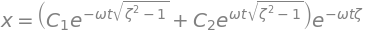

In [10]:
x_EL_ing_sol = sym.dsolve(x_EL_ing)
x_EL_ing_sol.simplify()

es una combinación lineal de las dos posible soluciones, pesadas por los coeficientes $C_i$.

### Periodo de relajación $\tau$
Independientemente del comportamiento que presente $x(t)$ en función de $\zeta$, el término $\operatorname{e}^{- \omega \zeta t}$ se encarga de ir reduciendo la amplitud a medida que aumenta $t$.
De hecho cada vez que transcurre este **período de relajación** $\tau = \frac{1}{\omega \zeta}$ la amplitud decae en $\operatorname{e}^{-1}$.
Se considera que trancurrido $\sim 10 \tau$ la oscilación se considera extinta.

### Críticamente amortiguado, $\zeta = 1$
Si $\zeta = 1$ se logra el comportamiento más sencillo

In [11]:
x_crit = x_EL_ing_sol.subs(zeta,1).simplify()
x_crit

que se trata de un acercamiento exponencial a la posición de equilibrio. 

Para visualizar estos comportamientos pueden determinarse los $C_i$ en función de los $x$ y $\dot{x}$ conocidos en un determinado $t$, las llamadas condiciones iniciales.

Si para $t_0 = 0$ conocemos $x_0 = x(t_0)$ y $\dot{x}_0 = \dot{x}(t_0)$

In [12]:
x_0, dx_0 = sym.symbols('x_0 \dot{x}_0', real=True)
crit_condInic = [sym.Eq(x_0, x_crit.args[1].subs(t, 0) ), sym.Eq(dx_0, x_crit.args[1].diff(t).subs(t, 0) ) ]
crit_condInic

de las que pueden despejarse los $C_i$ 

In [13]:
crit_condInic_sol = sym.solve(crit_condInic)
crit_condInic_sol

In [14]:
x_crit_condInic = x_crit.subs(crit_condInic_sol[0] )
x_crit_condInic.simplify()

Si por ejemplo asignamos

In [15]:
k = 100 # [N m-1]
m = 1 # [kg]
x_0_magnitud = 1 # [m]
dx_0_magnitud = -100 # [m s-1]

parametros ={
    x_0 : x_0_magnitud,
    dx_0 : dx_0_magnitud,
    omega : sym.sqrt(k/m)
}
x_crit_parametros = x_crit_condInic.subs(parametros)
x_crit_parametros

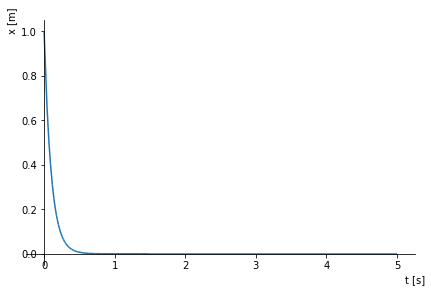

In [16]:
sym.plot(x_crit_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

### Sobreamortiguado, $\zeta > 1$
Si el amortiguamiento es aún más pronunciado, e.g. $\zeta = 2$

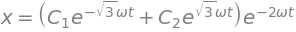

In [17]:
x_sobre = x_EL_ing_sol.subs(zeta, 2).simplify()
x_sobre

también habrá un acercamiento exponencial a $x=0$, pero puede haber violentas oscilaciones antes de alcanzar el punto de equilibrio.

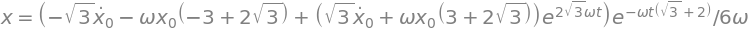

In [18]:
sobre_condInic = [sym.Eq(x_0, x_sobre.args[1].subs(t, 0) ), sym.Eq(dx_0, x_sobre.args[1].diff(t).subs(t, 0) ) ]
sobre_condInic_sol = sym.solve(sobre_condInic)
x_sobre_condInic = x_sobre.subs(sobre_condInic_sol[0] )
x_sobre_condInic.simplify()

Con las mismas condiciones iniciales

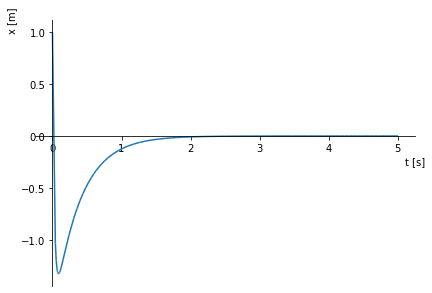

In [19]:
x_sobre_parametros = x_sobre_condInic.subs(parametros)
sym.plot(x_sobre_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

### Subamortiguado, $0< \zeta < 1$
El caso más frecuente es cuando se busca que la amortiguación no sea brusca   

In [20]:
x_sub = x_EL_ing_sol.subs(zeta, 0.2)
x_sub

Las exponenciales complejas con $i t$ pueden re-escribirse como funciones trigonométricas con igualdad de Euler $\mathrm{e}^{\pm i \theta}= \cos{\theta}+ i \sin{\theta}$.

$$
x= \left[ (C_1+ C_2) \cos{\omega t} + i(C_1- C_2) \sin{\omega t} \right] \operatorname{e}^{- \zeta \omega t}
$$
que presenta se observara una reducción de la amplitud de las oscilaciones en torno a la posición de equilibrio.


y escribir una solución de la dinámica en función de tales condiciones

In [21]:
sub_condInic = [sym.Eq(x_0, x_sub.args[1].subs(t, 0) ), sym.Eq(dx_0, x_sub.args[1].diff(t).subs(t, 0) ) ]
sub_condInic_sol = sym.solve(sub_condInic)
x_sub_condInic = x_sub.subs(sub_condInic_sol[0] )
x_sub_condInic

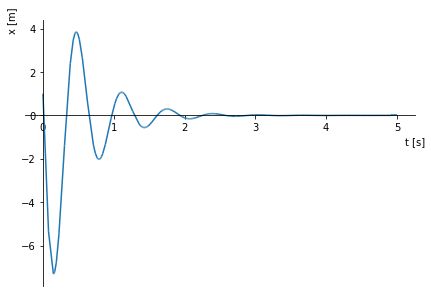

In [22]:
x_sub_parametros = x_sub_condInic.subs(parametros)
sym.plot(x_sub_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

### No amortiguado, $\zeta = 0$

In [23]:
x_noAmortiguado = x_EL_ing_sol.subs(zeta, 0)
x_noAmortiguado

In [24]:
noAmortiguado_condInic = [sym.Eq(x_0, x_noAmortiguado.args[1].subs(t, 0) ), sym.Eq(dx_0, x_noAmortiguado.args[1].diff(t).subs(t, 0) ) ]
noAmortiguado_condInic_sol = sym.solve(noAmortiguado_condInic)
x_noAmortiguado_condInic = x_noAmortiguado.subs(noAmortiguado_condInic_sol[0] )
x_noAmortiguado_condInic

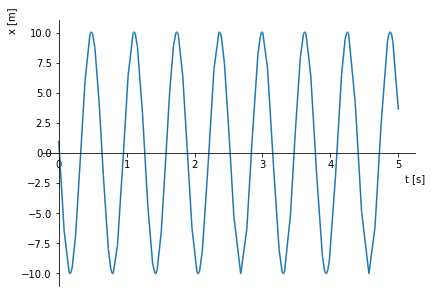

In [25]:
x_noAmortiguado_parametros = x_noAmortiguado_condInic.subs(parametros)
sym.plot(x_noAmortiguado_parametros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 